<div style="border:solid green 2px; padding: 20px">
<b>Денис, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Определение параметров для оценки раночной стоимости недвижимости 
Данные предоставлены сервисом "Яндекс Недвижимость".
Определение параметров будет произведено по архиву объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Предоставленные два вида данных: введённые пользователями вручную и полученные автоматически на основе картографии.
Результаты будут применены при создании автоматизированной системы определения аномалий и мошеннических действий с недвижимостью.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

## Загрузка данных

Данные загружаются из файла формата CSV.

In [1]:
# ячейка для подключения модулей python  и настроек отображения
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [2]:
# чтение файла CSV, в качестве разделителя использован символ табуляции
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# вывод на экран первых 5 строк считанного файла
display(data.head())
# вывод сводной информации о таблице
display(data.info())
# вывод основных статистик
display(data.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Данные из файла считались, таблица содержит 23699 записи по 22 колонкам.

Названия колонок и их расшифровка:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

В данных наблюдаются пропуски, в некоторохы столбцах их больше половины.
В таблице данные предоставлены следующими типами: `int`, `float`, `object`, `bool`.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально изучили наши первичные данные, давай теперь их обработаем. 
</div>

## Предобработка данных
Предобработка данных будет проведена в 5 этапа:
1. Переименование столбцов
2. Устранение выбросов
3. Устранение дубликатов
4. Устранение пропусков данных
5. Приведение типов данных

### Переименование столбцов

Приведём названия столбцов: `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`  к единому стилю.

In [3]:
data = data.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'
    }
)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный и безопасный способ заменить названия в столбцах 👍
</div>

### Устранение выбросов

Проверим наличие выбросов в столбцах с количественными значениями по гистограммам.

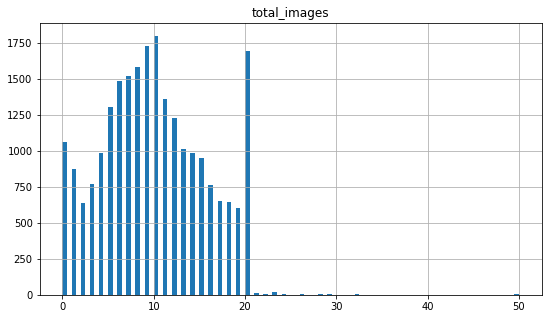

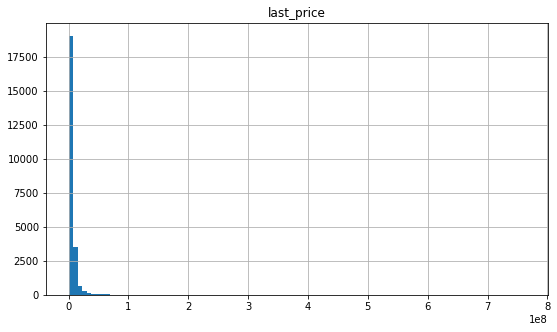

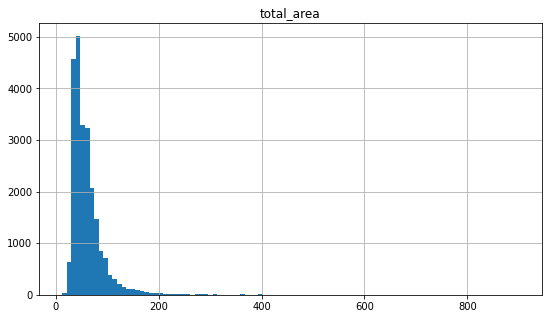

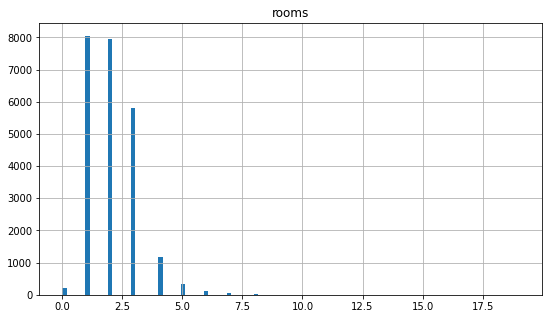

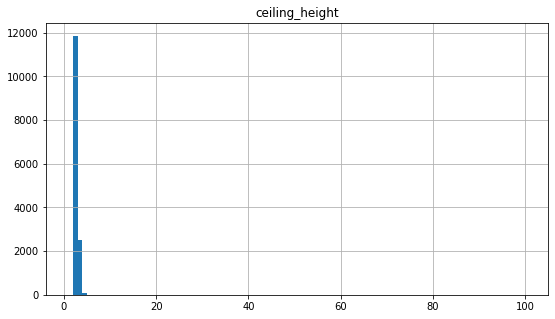

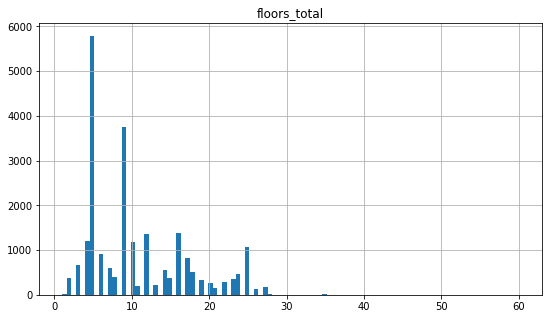

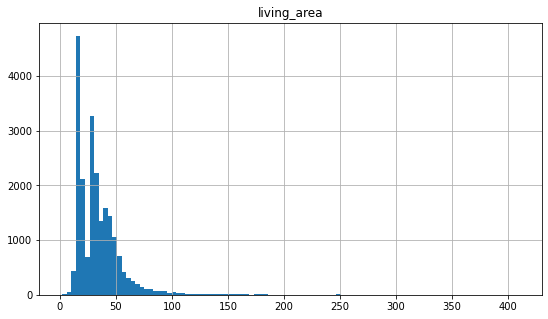

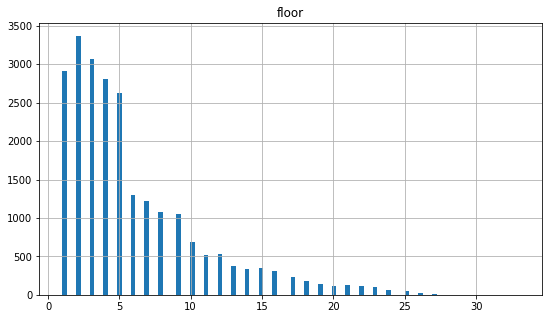

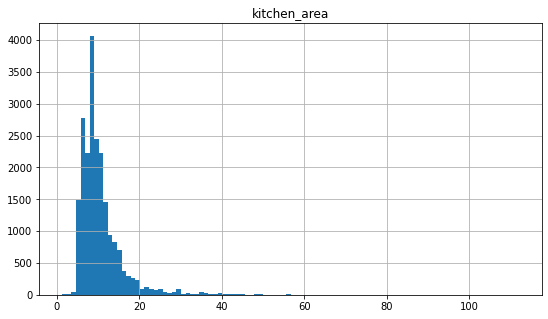

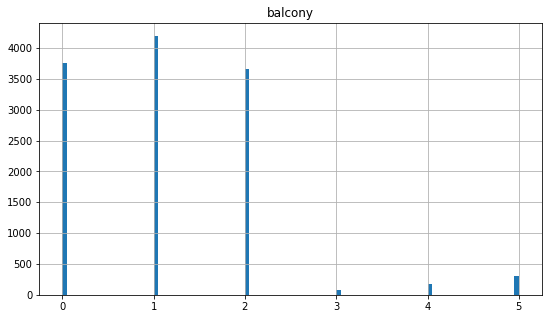

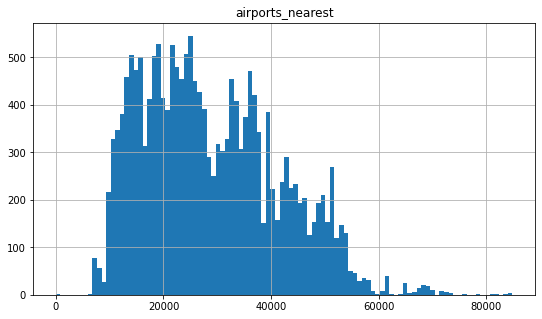

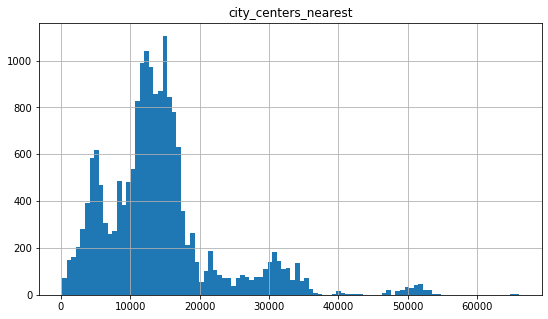

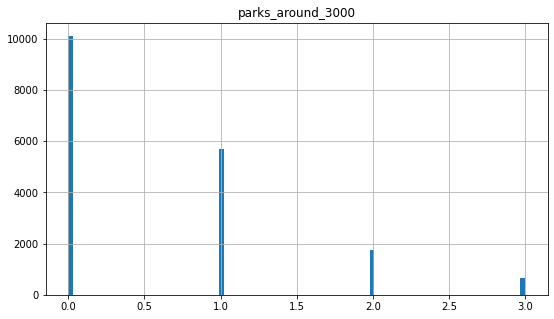

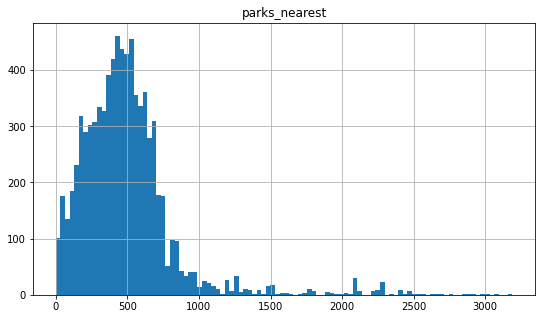

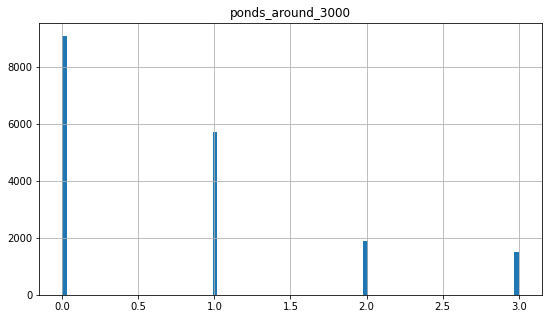

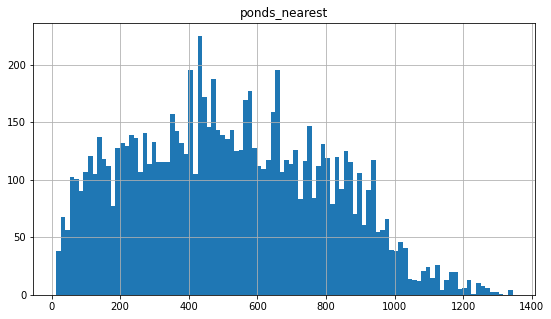

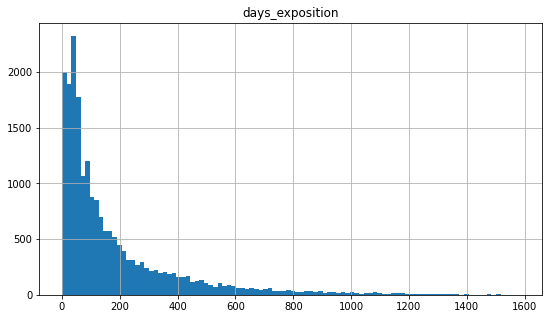

In [4]:
# `columns_number` - список названий столбцов с числовым типом данных
columns_number = data.columns[list(map(any,zip(data.dtypes == np.int64, data.dtypes == np.float64)))]

for column in columns_number:
    data.hist(column=column, bins=100, figsize=(9, 5))
    plt.show()

По гистограммам можно сделать следующие выводы по столбцам:
1. `total_images` имеет выбросы, но они не значительны (не превышают 50) и не влияют на результат исследования, оставим без изменения,
2. `last_price` имеет значительный выброс, который сжал гистограмму вправо, **выброс будет рассмотрен отдельно**,
3. `total_area` имеет высокое значение в районе 800, это значительная величина для площади квартиры, но она является возможной, оставим без изменения,
4. `rooms` имеет максимальные значения в районе 15, что является значительной величиной, но она является возможной, оставим без изменения,
5. `ceiling_height` имеет значительный выброс, который сжал гистограмму вправо, **выброс будет рассмотрен отдельно**,
6. `floors_total` имеет значительный выброс в районе 60, при том, что самый высокий жилой дом в Санкт-Петербурге имеет 37 этажей, **выброс будет рассмотрен отдельно**,
7. `living_area` имеет высокое значение в районе 400, это значительная величина для жилой площади квартиры, но она является возможной, оставим без изменения,
8. `floor` имеет хорошее распределение с максимальным значением в районе 30, что допустимо, оставим без изменений,
9. `kitchen_area` имеет высокое значение в районе 100, это значительная величина для площади кухни, но она является возможной, оставим без изменения,
10. `balcony` имеет максимальное значение 5, что допустимо, при наличии квартир большого метража, оставим без изменения,
11. `airports_nearest` имеет приемлемое распределение с максимальным значением в районе 80 км, отдельные пики на гистограмме могут относиться в большим жилым массивам, оставим без изменений,
12. `city_centers_nearest` имеет приемлемое распределение с максимальным значением в районе 60 км, отдельные пики на гистограмме могут относиться в большим жилым массивам, оставим без изменений,
13. `parks_around_3000` имеет разброс значений от 0 до 3 парков в радиусе 3000 метров, что выглядит правдоподобно, оставим без изменений,
14. `parks_nearest` имеет приемлемое распределение, оставим без изменения,
15. `ponds_around_3000` имеет разброс значений от 0 до 3 водоёмов в радиусе 3000 метров, что выглядит правдоподобно, оставим без изменений,
16. `ponds_nearest` имеет приемлемое распределение, оставим без изменения,
17. `days_exposition` имеет Пуассоновское распределение с максимальным значением около 1500 дней, что возможно, оставим без изменений.

По результату анализа гистограм рассмотрим отдельно столбцы: `last_price`, `ceiling_height`, `floors_total`.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что получилось применить автоматизацию построения графиков 👍
    
Теперь в нужный момент мы сможем применить данный инструмент.
    
---
    
Хороший подход увеличивать графики в размерах 👍
    
Это позволяет сделать все графики более удобными для чтения.
    
</div>

#### Выбросы столбца `last_price`
Рассмотрим гистограмму более внимательно разбив на 3 диапазона.

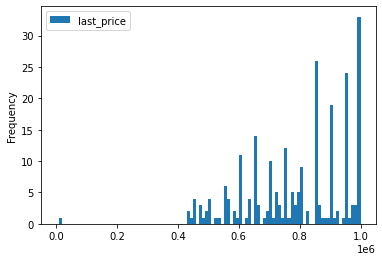

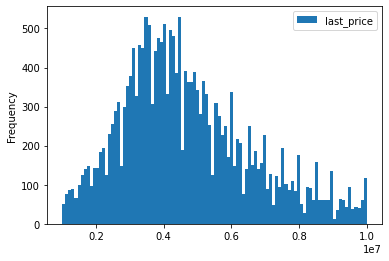

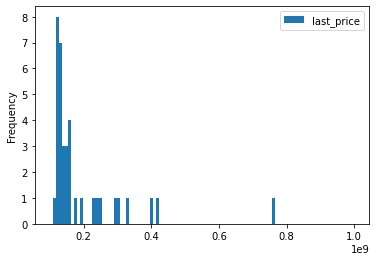

In [5]:
data.plot(y='last_price', kind='hist', bins=100, range=(0, 1000000))
data.plot(y='last_price', kind='hist', bins=100, range=(1000000, 10000000))
data.plot(y='last_price', kind='hist', bins=100, range=(100000000, 1000000000))
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Чтобы нам в ручную не задавать параметр `range` мы можем посмотреть в открытом доступе  – как считать интерквартильный размах для нижнего и верхнего уровня нормального распределения.
    
https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за совет, буду применять по необходимости.
В данном случае попробовал поиграться с диапазоном `range` задавая значения `q1-1.5*iqr` и `q3+1.5*iqr`. Мне разбиение показалось не информативным, думаю в анализе данных иногда приходится прибегать к некоторой доле субъективности.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Работа с выбросами всегда зависит от конкретной задачи. Например машинное обучение, важно почистить от них. Или какие-то сверхточные расчеты, которые желательно учитывать без выбросов, потому что сами по себе выбросы увеличивают какую-то метрику или уменьшают.    
</div>

Имеется одиночный минимальный выброс, посмотрим на описаный объект целиком.

In [6]:
display(data[data['last_price'] == data['last_price'].min()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Исходя из значения площади 109 м2, жилой площади 32 м2 и площади кухни 40.5 м2, очень похоже, что сумма была введена в тысячах, домножим значение на 1000.

In [7]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price'] * 1000
print(data.loc[8793, 'last_price'])

12190000.0


Также в столбце имеется одиночный максимальный выброс, посмотрим на описаный объект целиком.

In [8]:
display(data[data['last_price'] == data['last_price'].max()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Исходя из параметров квартиры, можно допустить столь высокую стоимость, оставим без изменений.

#### Выбросы столбца `ceiling_height`
Рассмотрим гистограмму более внимательно разбив на 2 диапазона.

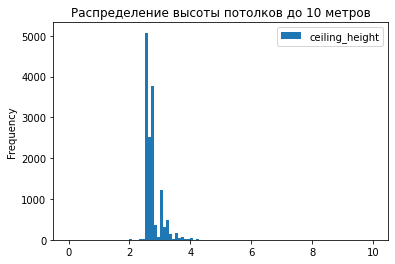

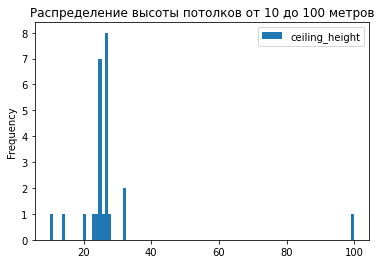

In [9]:
data.plot(y='ceiling_height', kind='hist', bins=100, range=(0, 10), title='Распределение высоты потолков до 10 метров')
data.plot(y='ceiling_height', kind='hist', bins=100, range=(10, 100), title='Распределение высоты потолков от 10 до 100 метров')
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>Не забывай пожалуйста подписавать каждый график. Это важный момент всего проект, потому что так быстрее понять о чем идёт речь на графике.

</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за указание, мотаю на ус. Подписал графики в данном разделе. Во всех разделах подписывать не стал, по причине экономии времени, но учту для следующих проектов.    

</div>

Встречаются квартиры с высотой потолков более 10 метров, что является ошибкой, квартиры с высотой потолков менее 10 метров но больше стандартной можно предположить за второй свет у двухэтажных квартир. Посмотрим на сами значения.

In [10]:

print('Значения высоты потолков более 10 метров:', data[data['ceiling_height'] > 10]['ceiling_height'].tolist())

Значения высоты потолков более 10 метров: [25.0, 32.0, 25.0, 27.0, 24.0, 27.0, 26.0, 27.0, 25.0, 25.0, 27.0, 25.0, 25.0, 14.0, 20.0, 27.0, 25.0, 27.0, 22.6, 27.5, 27.0, 10.3, 32.0, 100.0, 27.0]


Похоже большинство значений более 10 было введено некорректно, без запятой, нужно переместить в них запятую на одно значение влево.
Значения 14.0, 10.3, 100.0, нужно удалить.

In [11]:
data['ceiling_height'] = data['ceiling_height'].where(~data['ceiling_height'].isin([14.0, 10.3, 100.0]), np.nan)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10, data['ceiling_height'] / 10)
print('Количество значений высоты потолков более 10 метров:', data[data['ceiling_height'] > 10]['ceiling_height'].count())

Количество значений высоты потолков более 10 метров: 0


#### Выбросы столбца `floors_total`
Рассмотрим гистограмму более внимательно разбив на 2 диапазона, первый диапазон включает в себя все возможные дома с этажностью до 37 включительно (возможные варианты для Санкт-Петербурга и пригорода), второй более 38 этажей включительно.

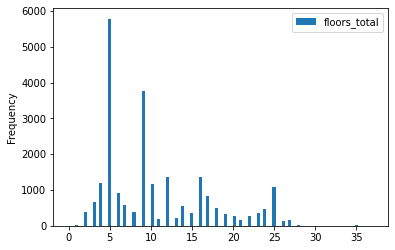

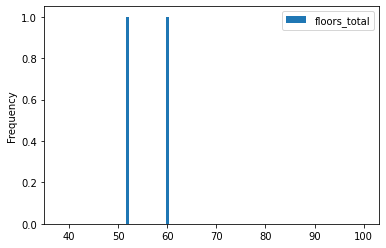

In [12]:
data.plot(y='floors_total', kind='hist', bins=100, range=(0, 37))
data.plot(y='floors_total', kind='hist', bins=100, range=(38, 100))
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за совет.    

</div>

Во второй гистограмме встретились всего два дома, удалим значение этажности для этих домов.

In [13]:
data['floors_total'] = data['floors_total'].where(data['floors_total'] < 38, np.nan)
print('Количество домов с этажностью более 37:', (data['floors_total'] > 37).sum())

Количество домов с этажностью более 37: 0


Выбросы в базе данных почищены, их было немного, данные действия не должны значимо сказаться на результатах исследования.

### Устранение дубликатов

Приведём значения столбца `locality_name` к нижнему регистру, выберем оригинальные значения и отсортируем.

In [14]:
data['locality_name'] = data['locality_name'].str.lower()
display(sorted(data['locality_name'].dropna().unique().tolist()))

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской поселок большая ижора',
 'городской поселок янино-1',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',

Видно, что много встречается повторений для насёлённых пунктов отнесённых к разным категориям, **оставим только названия населённых пунктов**.

In [15]:
def replace(locality_name):
    replace_list = ['деревня ', 'село ', 'садовое товарищество ', 'садоводческое некоммерческое товарищество ',
                    'посёлок городского типа ', 'поселок городского типа ', 'посёлок при железнодорожной станции ',
                    'коттеджный поселок ', 'коттеджный посёлок ', 'посёлок пансионат ', 'городской посёлок ',
                    'городской поселок ', 'поселок пансионат ','поселок станции ', 'посёлок ', 'поселок ']
    name = locality_name
    if type(locality_name) == str:
        for unit_list in replace_list:
            name = name.replace(unit_list, '')
    return name

data['locality_name'] = data['locality_name'].apply(replace)
display(sorted(data['locality_name'].dropna().unique().tolist()))

['агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпосёлок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зелёный бор',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичёво',
 'имен

После устранения неявных дубликатов в названиях населённых пунктов, проверим наличие явных дубликотов.

In [16]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


Явные дубликаты в таблице отсутствуют.

### Устранение пропусков

#### Пропуски в столбцах: `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest`

Пропуски в столбцах связанных с локализацией на местности заполним медианами для соответствующих населённых пунктов.
Это столбцы:
1. `airports_nearest` - расстояние до аэропорта
2. `city_centers_nearest` - расстояние от центра города
3. `parks_nearest` - расстояние до ближайшего парка 
4. `ponds_nearest` - расстояние до ближайшего водоёма

In [17]:
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform("median"))
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].transform("median"))
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform("median"))
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform("median"))

#### Пропуски в столбцах: `ceiling_height`, `locality_name`

1. `ceiling_height` - высота потолков содержит большое количество пропусков, заполнять их каким то числовым значением не верно, это может сильно исказить статистику, удалить строки с этими пропусками также невозможно, в связи с большой потерей данных. **Оставим столбец с пропусками без изменений**. Если возникнет необходимость, то в дальнеймеш примем решение.
2. `locality_name` - название населённого пункта, имеет небольшое количество пропусков, так как данные в столбце являются категориальными, заполнить их какими то данными, не представляется возможным, удалять также пока не будем, с целью сохранения данных. **Оставим столбец с пропусками без изменений**. Если возникнет необходимость, то в дальнеймеш примем решение.

#### Пропуски в столбцах `floors_total`
1. `floors_total` - этажность здания, заполнить пропуски медианным, средним или максимальным значением нельзя - это приведёт к ошибочной оценке положения квартиры в доме (первый, последнем или другом этаже),число пропусков 86, что не значительно и не должно повлиять на результаты. **Удалим строки с пропусками**.

In [18]:
data = data.dropna(subset=['floors_total'])

#### Пропуски в столбцах `living_area`, `kitchen_area`, `days_exposition`
1. `living_area` - жилая площадь, имеет порядка 9 % пропусков, **заполним эти значения медианной**, так как эта величина наименее чувтсвительна к выбросам.
2. `kitchen_area` - жилая площадь, имеет порядка 10 % пропусков, **заполним эти значения медианной**, так как эта величина наименее чувтсвительна к выбросам.
3. `days_exposition` - срок размещения объявления, имеет порядка 10 % пропусков, **заполним эти значения медианной**, так как эта величина наименее чувтсвительна к выбросам.


In [56]:
data = data.fillna(value={'living_area': data['living_area'].median()})
data = data.fillna(value={'kitchen_area': data['kitchen_area'].median()})
data = data.fillna(value={'days_exposition': data['days_exposition'].median()})

#### Пропуски в столбце `is_apartment`
1. `is_apartment` - аппартаменты, имеет большое количество пропусков, наиболее вероятно, данные пропуски связаны с тем, что помещение не является аппартаментами. **Заполним эти значения False**.

In [20]:
data = data.fillna(value={'is_apartment': False})

#### Пропуски в столбцах: `balcony`, `parks_around_3000`, `ponds_around_3000`
1. `balcony` - количество балконов, имеет порядка половины пропусков в данных, наиболее вероятно, данные пропуски связаны с отсутствием балконов у данных объектов недвижимости. **Заполним эти значения 0**.
2. `parks_around_3000` - количество парков в радиусе 3 км, наиболее вероятно, данные пропуски связаны с отсутствием рядом расположеных парков у данных объектов недвижимости. **Заполним эти значения 0**.
3. `ponds_around_3000` - количество водоёмов в радиусе 3 км, наиболее вероятно, данные пропуски связаны с отсутствием рядом расположеных водоёмов у данных объектов недвижимости. **Заполним эти значения 0**.

In [21]:
data = data.fillna(value={'balcony': 0, 'parks_around_3000': 0, 'ponds_around_3000': 0})

### Приведение типов данных

Приведём типы данных для следующих колонок:
- `last_price` — цена указанная в рублях, целое чило, приведём к типу `int`
- `floors_total` — всего этажей в доме, целое чило, приведём к типу `int`
- `balcony` — число балконов, целое чило, приведём к типу `int`
- `parks_around3000` — число парков в радиусе 3 км, целое чило, приведём к типу `int`
- `ponds_around3000` — число водоёмов в радиусе 3 км, целое чило, приведём к типу `int`
- `days_exposition` — сколько дней было размещено объявление, целое чило, приведём к типу `int`
- `first_day_exposition` — дата публикации, приведём к типу `datetime`, без часов, минут и секунд (они являются нулями).

In [22]:
# columns_to_int - список названий столбцов для перевода типа данных в int
columns_to_int = ['last_price', 'floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition']
for column_to_int in columns_to_int:
    data[column_to_int] = data[column_to_int].astype('int')
    
# приведение first_day_exposition к типу данных datetime  
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Классный и быстрый способ заменить типы данных внутри нашего датасета.
</div>

### Выводы предобработка данных
В ходе предобработки данных выполнено:
1. Переименованы столбцы: `city_centers_nearest`, `parks_around_3000`, `ponds_around_3000`;
2. Устранены выбросы в столбцах: `last_price`, `ceiling_height`, `floors_total`;
3. Устранены неявные дубликаты в столбце: `locality_name`;
4. Частично устраненены пропуски данных в столбцах: `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest`;
5. Полностью устранены пропуски данных в столбцах: `floors_total`, `living_area`, `kitchen_area`, `days_exposition`, `is_apartment`, `balcony`, `parks_around_3000`, `ponds_around_3000`;
6. Приведены типы данных для столбцов: `last_price`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`, `first_day_exposition`.

## Расчёты и добавление результатов в таблицу

### Добавление в таблицу цены квадратного метра
Создадим столбец `square_meter_price`, в котором сохраним цену квадратного метра для объекта недвижимости.

In [23]:
data['square_meter_price'] = data['last_price'] / data['total_area']

### Добавление в таблицу дня недели, месяца и года публикации объявления
Создадим столбецы:
- `weekday`, в котором сохраним день недели публикации объявления;
- `month`, в котором сохраним месяц публикации объявления;
- `year`, в котором сохраним год публикации объявления.

In [24]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

### Добавление в таблицу этажа квартиры: первый, последний, другой
Создадим столбец `floor_type`, в котором сохраним тип этажа квартиры:
- `first` - для первого этажа,
- `last` - для последнего этажа,
- `other` - любой другой этаж.

In [25]:
data['floor_type'] = data['floor'].where(data['floor'] != 1, 'first')
data['floor_type'] = data['floor_type'].where(~(data['floor_type'] == data['floors_total']), 'last')
data['floor_type'] = data['floor_type'].where(data['floor_type'].isin(['first','last']), 'other')
print('Уникальные значения в столбце floor_type:', data['floor_type'].unique())

Уникальные значения в столбце floor_type: ['other' 'first' 'last']


### Добавление в таблицу соотношения жилой и общей площади
Создадим столбец `living_total_relative_area`, в котором сохраним отнощение жилой площади к общей.

In [26]:
data['living_total_relative_area'] = data['living_area'] / data['total_area']

### Добавление в таблицу соотношения площади кухни к общей
Создадим столбец `kitchen_total_relative_area`, в котором сохраним отнощение площади кухни к общей.

In [27]:
data['kitchen_total_relative_area'] = data['kitchen_area'] / data['total_area']

### Выводы по расчёту и добавлению результатов в таблицу

Проверим что в таблице появились новые столбцы и они заполнены значениями.

In [28]:
display(data.loc[:,'square_meter_price':'kitchen_total_relative_area'].head())

,square_meter_price,weekday,month,year,floor_type,living_total_relative_area,kitchen_total_relative_area
0,120370.370370,3,3,2019,other,0.472222,0.231481
1,82920.792079,1,12,2018,first,0.460396,0.272277
2,92785.714286,3,8,2015,other,0.612500,0.148214
3,408176.100629,4,7,2015,other,0.188679,0.057233
4,100000.000000,1,6,2018,other,0.320000,0.410000



В таблицу добавлены и заполнены значениями следующие столбцы:
1. `square_meter_price`, в котором сохранили цену квадратного метра для объекта недвижимости;
2. `weekday`, в котором сохранили день недели публикации объявления;
3. `month`, в котором сохранили месяц публикации объявления;
4. `year`, в котором сохранили год публикации объявления;
5. `floor_type`, в котором сохранили тип этажа квартиры;
6. `living_total_relative_area`, в котором сохранили отнощение жилой площади к общей;
7. `kitchen_total_relative_area`, в котором сохранили отнощение площади кухни к общей.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

## Исследовательский анализ данных

### Анализ параметров: площадь, цена, число комнат, высота потолков

Построим гистограмму для площади.

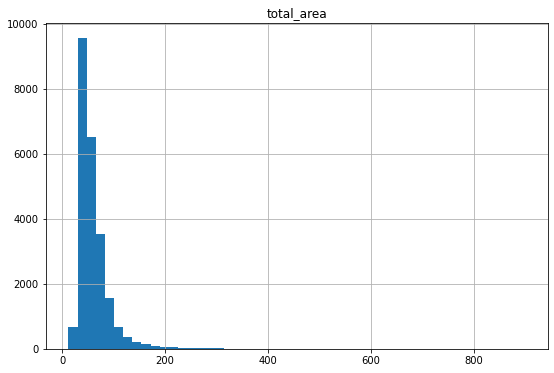

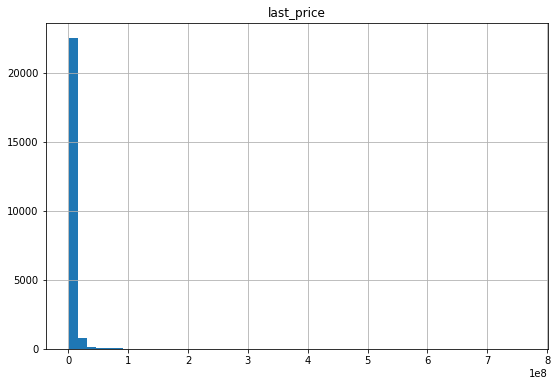

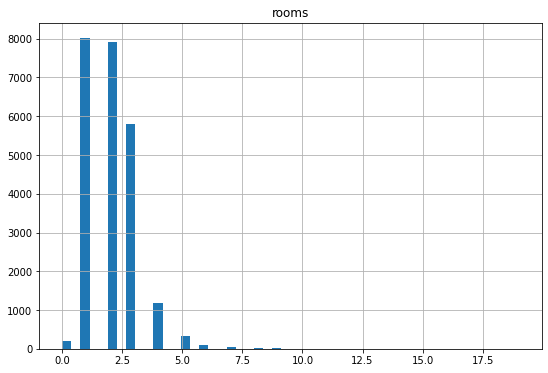

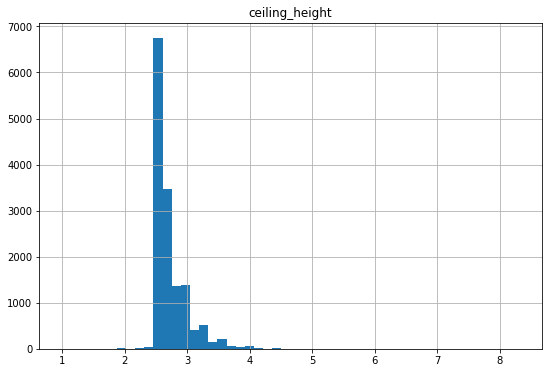

In [29]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    data.hist(column=column, bins=50, figsize=(9, 6))
plt.show()

Как видно из гистограмм, данные во всех столбцах сильно смещены в лево, значит имеется выброс в правой части.
Удалим выбросы выходящие за пределы 1,5 межквартильного размаха для каждого столбца.

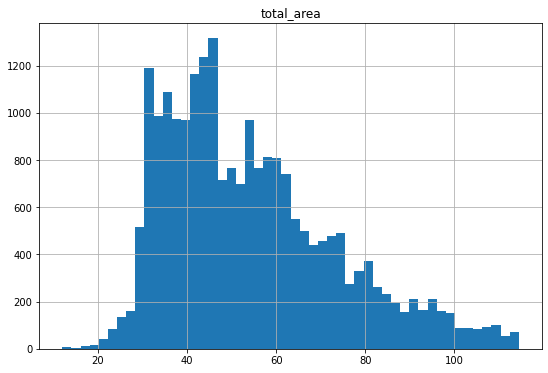

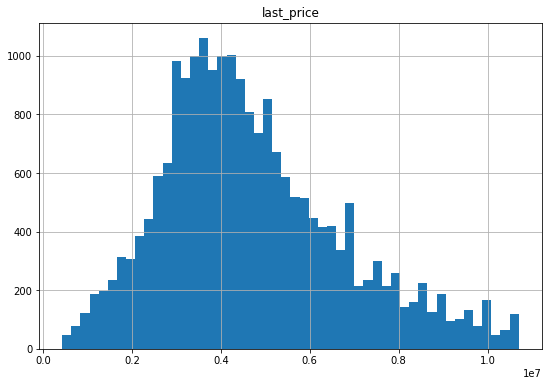

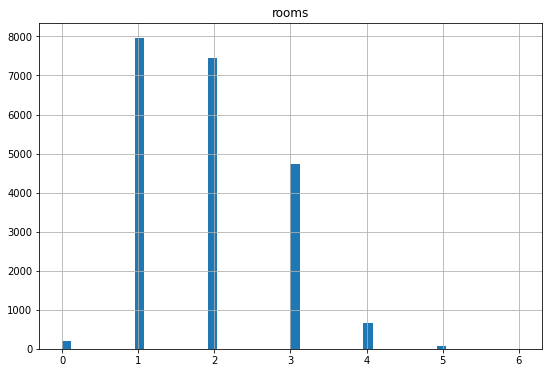

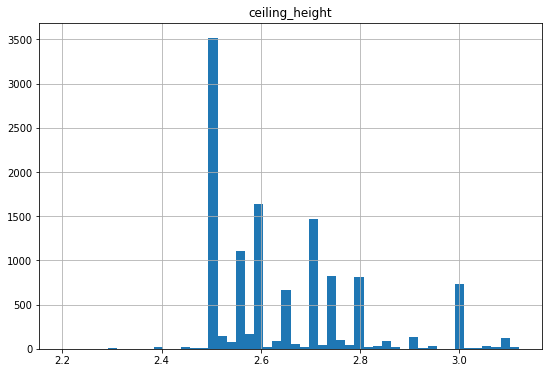

In [30]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    upper_fence = data[column].quantile(.75) + (data[column].quantile(.75) - data[column].quantile(.25)) * 1.5
    lower_fence = data[column].quantile(.25) - (data[column].quantile(.75) - data[column].quantile(.25)) * 1.5
    data = data.drop(data[data[column] > upper_fence].index).reset_index(drop=True)
    data = data.drop(data[data[column] < lower_fence].index).reset_index(drop=True)
    data.hist(column=column, bins=50, figsize=(9, 6))
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
Например это бы подошло для построения цикла для графиков.
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за совет. 

</div>

После отсечения выбросов, гистограммы стали более широкими и заполнеными.

In [31]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    print(f'Значения 1 и 3 квантилей для столбца {column} составляет: {data[column].quantile(.25)} и {data[column].quantile(.75)}')

Значения 1 и 3 квантилей для столбца total_area составляет: 38.5 и 62.0
Значения 1 и 3 квантилей для столбца last_price составляет: 3270000.0 и 5750000.0
Значения 1 и 3 квантилей для столбца rooms составляет: 1.0 и 3.0
Значения 1 и 3 квантилей для столбца ceiling_height составляет: 2.5 и 2.74


Можно сказать, что половина всех объявлений содержит информацию о продаже квартиры из диапазонов:
- площадь от 38,5 до 62 м2;
- стоимость от 3,27 до 5,75 млн. руб.;
- число комнат от 1 до 3;
- высота потолка от 2,5 до 2,74 м.

### Анализ времени продажи квартиры

Изучим время продажи квартир, значения столбца `days_exposition`. Для начала построим гистограмму.

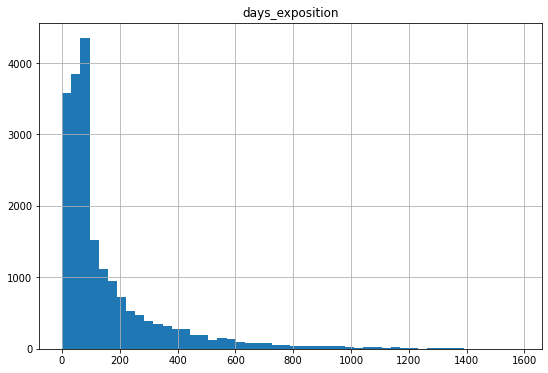

In [32]:
data.hist(column='days_exposition', bins=50, figsize=(9, 6))
plt.show()

По гистограмме видно, что время продажи квартир имеет распределение Пуасcона.
Определим среднее и медианное значение продажи квартир.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Если вдруг тебе понравилась тема визуализации, рекомендую посмотреть на библиотеку `seaborn`.    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за совет. В данном случае `seaborn` не применил из-за старой версии библиотеки на платформе `practicum.yandex.ru`, изночально мной была сделана часть проекта локально с применением новой версии `seaborn`. Пришлось отказаться в пользу более стабильного варианта для платформы. Сейчас говорят, что версию обновили, так что буду пробовать применить `seaborn` в следующем проекте.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

👍

</div>

In [33]:
print(f"Среднее время продажи квартиры составляет {int(data['days_exposition'].mean())} дней.")
print(f"Медианное время продажи квартиры составляет {int(data['days_exposition'].median())} дней.")
print(f"Максимальное время продажи квартиры составляет {int(data['days_exposition'].max())} дней.")

Среднее время продажи квартиры составляет 160 дней.
Медианное время продажи квартиры составляет 95 дней.
Максимальное время продажи квартиры составляет 1580 дней.


Среднее время продажи квартиры 160 дней, сильно отличается от медианного значения 95 дней, в виду наличия выбросов с большими значениями, самое большое из которых 1580 дней. Удалим выбросы выходящие за пределы 1,5 межквартильного размаха.

In [34]:
column = 'days_exposition'
upper_fence = data[column].quantile(.75) + (data[column].quantile(.75) - data[column].quantile(.25)) * 1.5
lower_fence = data[column].quantile(.25) - (data[column].quantile(.75) - data[column].quantile(.25)) * 1.5
data = data.drop(data[data[column] > upper_fence].index).reset_index(drop=True)
data = data.drop(data[data[column] < lower_fence].index).reset_index(drop=True)

После устранения выбросов, посмотрим на гистограмму ещё раз.

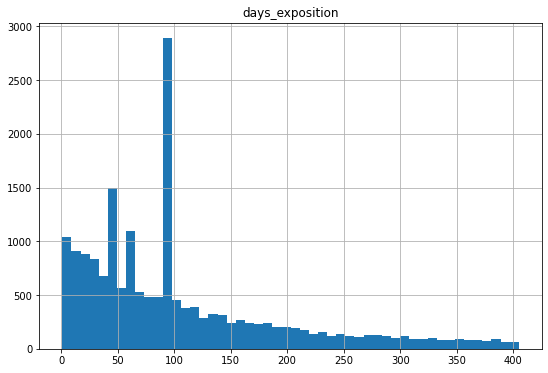

In [35]:
data.hist(column='days_exposition', bins=50, figsize=(9, 6))
plt.show()

Выделились 3 пиковых значения, похоже есть какие то факторы влияющие на длительность размещения объявления не связанные с продажей, так как они выбиваются из общего распределения. Попробуем определить значения взяв 3 самых частых уникальных в столбце `days_exposition`.

In [36]:
data['days_exposition'].value_counts().head(3)

95    2471
45     866
60     517
Name: days_exposition, dtype: int64

Для проверки нарисуем гистограмму с диапазоном 40 - 100 и числом корзин 100.

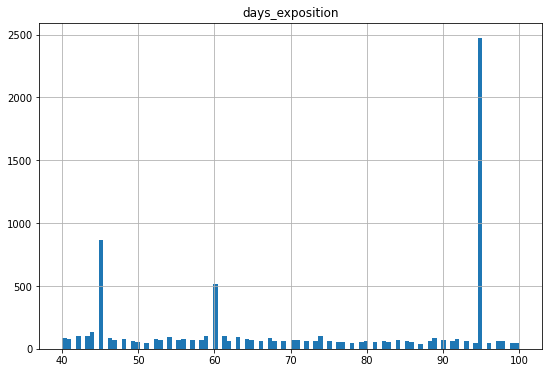

In [37]:
data.hist(column='days_exposition', bins=100, figsize=(9, 6), range=(40, 100))
plt.show()

Видно, что гистограмма подтверждает пики для значений 45, 60, 95.
Проверим две гипотезы возникновения пиков:
1. Пики связаны с открытием продаж в каком то объекте недвижимости с большим спросом, тогда эти пики являются реальными продажами,
2. Пики связаны с особенностью сервиса размещения объявлений, вероятно для него имеется различные условия подачи объявлений, с ограничениями по сроку действия: 45, 60, 95 дней, тогда эти пики не являются продажами, а просто снятые объявления в виду условий размещения.

Посмотрим на столбцы с датой размещения объявления и населённым пунктом у которых срок размещения составляет 45 дней.

In [38]:
display(data.loc[data['days_exposition'] == 45, ['first_day_exposition', 'locality_name']].head(10))

,first_day_exposition,locality_name
63,2018-02-22,санкт-петербург
72,2018-10-25,сиверский
86,2017-09-29,пикколово
118,2017-05-21,петергоф
120,2017-11-07,янино-1
128,2017-12-02,плодовое
146,2017-10-13,санкт-петербург
165,2016-06-15,шушары
180,2018-01-12,новый свет
220,2017-06-05,санкт-петербург


Как видно первое предположение не подтверждается, это разные объекты и у них разная дата размещения объявления.
Посмотрим аналогичные данные для 60 и 95 дней.

In [39]:
display(data.loc[data['days_exposition'] == 60, ['first_day_exposition', 'locality_name']].head(10))
display(data.loc[data['days_exposition'] == 95, ['first_day_exposition', 'locality_name']].head(10))

,first_day_exposition,locality_name
17,2017-04-24,кудрово
65,2018-01-15,шушары
84,2018-01-07,санкт-петербург
91,2019-02-24,санкт-петербург
110,2016-06-08,санкт-петербург
269,2016-04-25,санкт-петербург
276,2018-08-22,мурино
319,2016-07-04,санкт-петербург
374,2017-12-21,санкт-петербург
389,2018-09-06,кудрово


,first_day_exposition,locality_name
4,2019-04-18,санкт-петербург
34,2018-11-18,санкт-петербург
35,2018-12-02,санкт-петербург
36,2019-01-31,санкт-петербург
39,2018-11-22,санкт-петербург
57,2019-03-27,санкт-петербург
67,2019-03-13,кировск
70,2019-04-23,санкт-петербург
71,2019-04-09,лебяжье
80,2019-03-23,новая ропша


Ситуация повторилась, срок размещения объявлений 45, 60 и 95 дней, вероятнее всего не связан с продажей, а является ограничением в условиях подачи объявлений. Нужно уточнить данную информацию в техническом отделе.

Удалим эти данные для устранения их влияния на статистики по реальным продажам. Проверим результат нарисовав гистограмму.

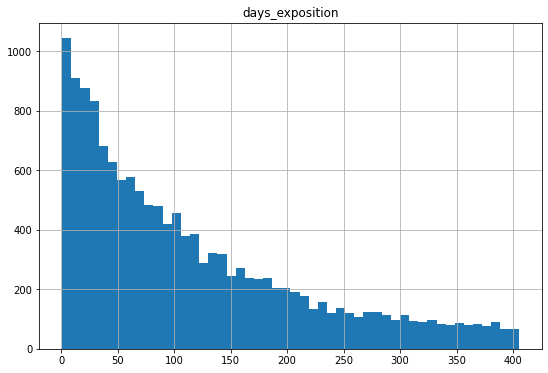

In [40]:
data = data.drop(data[data['days_exposition'].isin([45, 60, 95])].index).reset_index(drop=True)
data.hist(column='days_exposition', bins=50, figsize=(9, 6))
plt.show()

Получили достаточно плавную гистограмму для времени продажи квартир, без каких то выбросов и пиков. Посмотрим на статистические значения времени продажи.

In [41]:
display(data['days_exposition'].describe())

count    14531.000000
mean       114.304797
std        100.372604
min          1.000000
25%         33.000000
50%         84.000000
75%        169.000000
max        405.000000
Name: days_exposition, dtype: float64

Как видно, 25 % квартир продаются за 33 дня, половина квартир продаётся за 84 дня, а 75 % квартир за 169 дней.

### Определение факторов с большим влиянием на стоимость квартиры

Построим диаграммы рассеяния и посчитаем коэффициент корреляции Пирсона для стоимости квартир относительно значений столбцов:
- `total_area` общая площадь;
- `rooms` число комнат;
- `city_centers_nearest` расстояние от центра;
- `floor_type` тип этажа (первый, последний, другой);
- `weekday` день недели размещения объявления;
- `month` месяц размещения объявления;
- `year` год размещения объявления.

#### Влияние площади на цену квартиры

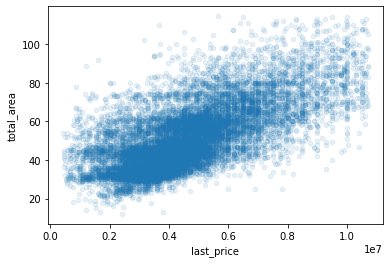

Коэффициент корреляции Пирсона: 0.6842430606376967


In [42]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)
plt.show()
print('Коэффициент корреляции Пирсона:', data['last_price'].corr(data['total_area']))

Видно, что имеется прямая зависимости между общей площадью и стоимостью квартиры, коэффициент Пирсона равен 0.68.

#### Влияние числа комнат на цену квартиры

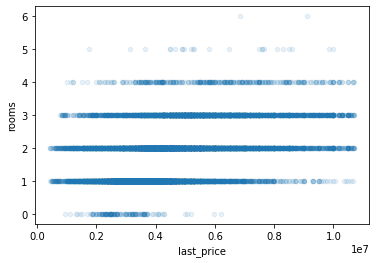

Коэффициент корреляции Пирсона: 0.4284981354172099


In [43]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)
plt.show()
print('Коэффициент корреляции Пирсона:', data['last_price'].corr(data['rooms']))

Видно, что имеется незначительная прямая зависимости между числом комнат и стоимостью квартиры, коэффициент Пирсона равен 0.43.

#### Влияние удалённости от центра на цену квартиры

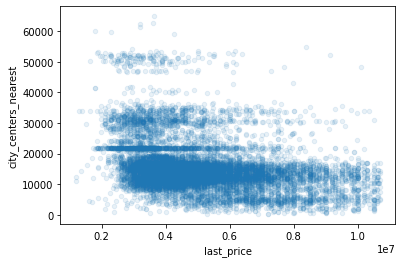

Коэффициент корреляции Пирсона: -0.3300906071620145


In [44]:
data.plot(x='last_price', y='city_centers_nearest', kind='scatter', alpha=0.1)
plt.show()

print('Коэффициент корреляции Пирсона:', data['last_price'].corr(data['city_centers_nearest']))

Видно, что имеется незначительная обратная зависимости между расстоянием от цента города и стоимостью квартиры, коэффициент Пирсона равен -0.33.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Хорошие и логичные комментарии. Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за совет.

</div>

#### Влияние этажа на цену квартиры

Построим ящик с усами и посмотрим статистические величины для первого, последнего и средних этажей

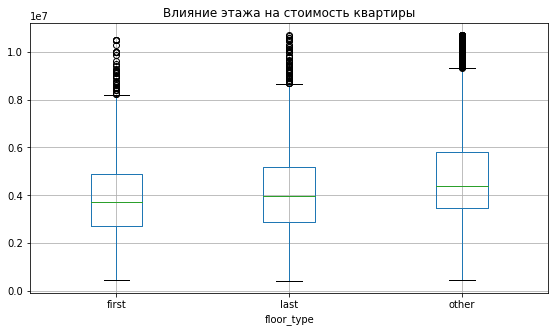

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
first,1749.0,3.915154e+06,1.784903e+06,450000.0,2700000.0,3699000.0,4900000.0,10500000.0
last,1895.0,4.231610e+06,1.997215e+06,430000.0,2900000.0,3950000.0,5200000.0,10700000.0
other,10887.0,4.764658e+06,1.902893e+06,450000.0,3450000.0,4400000.0,5800000.0,10700000.0


In [45]:
data.boxplot(column='last_price', by='floor_type', figsize=(9,5))
plt.suptitle('')
plt.title('Влияние этажа на стоимость квартиры')
plt.show()
data.groupby(by='floor_type')['last_price'].describe()

Из диаграммы "ящик с усами" и сводных статистик видно, что стоимость квартиры зависит от этажа на котором она расположена:
1. квартиры первого этажа имеют наименьшую стоимость, в среднем она составляет 3.92 млн. руб,
2. квартиры верхнего этажа имеют промежуточную стоимость, которая в среднем составляет 4.23 млн. руб.,
3. квартиры средних этажей имеют наибольшую стоимость, в среднем 4.76 млн. руб.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно отключить предупреждения с помощью следующего способа ниже.
    
`import warnings` 
    
`warnings.simplefilter('ignore')` 
    
---
    
Мы также можем скрыть стандартную подпись графика с помощью метода `plt.suptitle('')`
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за совет. Применил метод `plt.suptitle('')` и подписал название графика.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Рад, что бОльшую часть комментариев получается применить сразу, ведь только так информация запоминается лучше.

</div>

#### Влияние даты размещения на цену квартиры

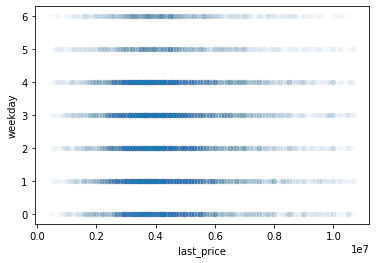

Коэффициент корреляции Пирсона: -0.009867295377969229


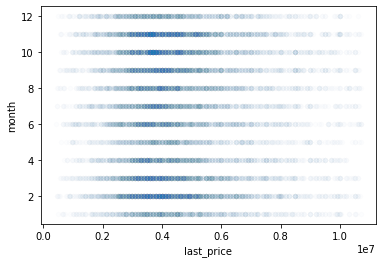

Коэффициент корреляции Пирсона: -0.005204942216687874


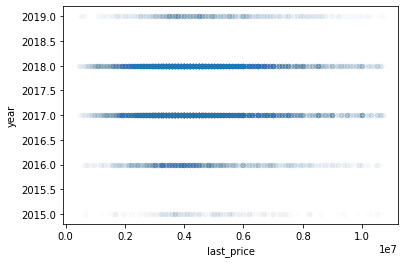

Коэффициент корреляции Пирсона: 0.015536986363010988


In [46]:
data.plot(x='last_price', y='weekday', kind='scatter', alpha=0.01)
plt.show()
print('Коэффициент корреляции Пирсона:', data['last_price'].corr(data['weekday']))
data.plot(x='last_price', y='month', kind='scatter', alpha=0.01)
plt.show()
print('Коэффициент корреляции Пирсона:', data['last_price'].corr(data['month']))
data.plot(x='last_price', y='year', kind='scatter', alpha=0.01)
plt.show()
print('Коэффициент корреляции Пирсона:', data['last_price'].corr(data['year']))

Из диаграмм рассеяния видно, что какой то явной зависимости цены от дня недели, месяца и года не наблюдается (видно изменение плотности точек для разных времен размещения объявления, например в будни дредложений больше чем на выходных, но характер изменения плотнисти одинаков).

#### Вывод: факторы с большим влиянием на стоимость квартиры
Выявлено три основных фактора влияющих на стоимость квартиры, расположим их в порядке убывания:
1. Общая площадь, коэффициент Пирсона 0.68;
2. Число комнат, коэффициент Пирсона 0.43;
3. Удалённость от центра города, коэффициент Пирсона 0.33.

### Определение разброса цены для 10 населённых пунктов с наибольшим числом объявлений

Определим список 10 населённых пунктов с наибольшим числом объявлений и сделаем упорядоченную сводную таблицу со средним значением стоимости квадратного метра для каждого населённого пункта.

,square_meter_price
locality_name,
санкт-петербург,103726.563240
пушкин,99328.689117
кудрово,94220.670909
парголово,89362.749947
мурино,85811.966125
шушары,78069.301261
колпино,74976.629174
гатчина,67961.161957
всеволожск,66555.621745


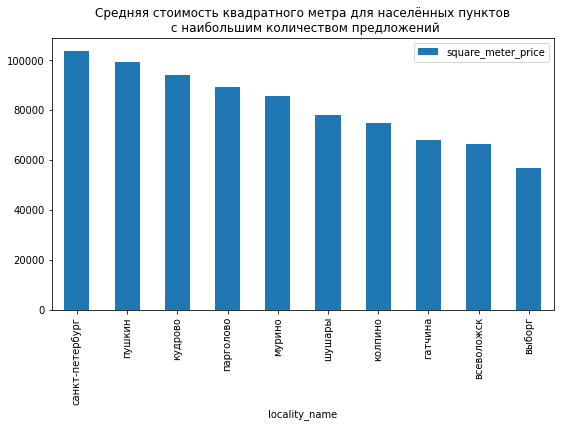

In [47]:
# name_list список 10 населённых пунктов с наибольшим числом объявлений
name_list = list(data['locality_name'].value_counts().head(10).index)
# создание упорядоченной сводной таблицы со средним значением стоимости квадратного метра
top_square_meter_mean = (data.query("locality_name in @name_list").
 pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean').
 sort_values(by='square_meter_price', ascending=False)
)
display(top_square_meter_mean)
top_square_meter_mean.plot(figsize=(9, 5), kind='bar', title='Средняя стоимость квадратного метра для населённых пунктов\n с наибольшим количеством предложений')
plt.show()

#### Вывод: разброс цены для 10 населённых пунктов с наибольшим числом объявлений
Составлен список из 10 самых популярных по количеству объявлений населённых пунктов.

Наибольшая цена квадратного метра определена в Санкт_петербурге и составляет 103727 руб, наименьшая стоимость в Выборге 57013 руб.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Также можно было бы визуализировать эту таблицу, ведь на графике информацию воспринимать гораздо легче, чем в таблице.    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за совет. Добавил вывод графика, также подписал его название.

</div>

### Определение границы центральной области в Санкт-Петербурге относительно стоимости недвижимости

Создадим столбец с расстоянием от центра города выраженном в километрах.
Построим графики зависимости стоимости объекта недвижимости и стоимости за квадратный метр относительно расстояния от центра города.

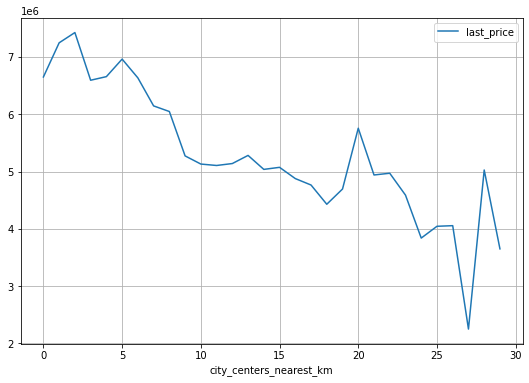

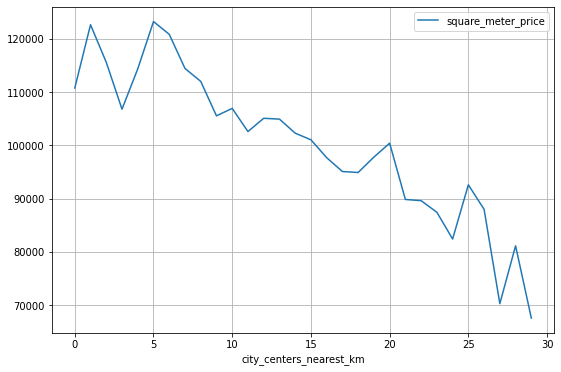

In [48]:
# создание столбца с расстояние до центра в километрах
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(decimals=0)
# построение графиков изменения 'last_price' и 'square_meter_price' в зависимости удаления от центра
data.query("locality_name == 'санкт-петербург'").pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(figsize=(9,6), grid=True)
data.query("locality_name == 'санкт-петербург'").pivot_table(index='city_centers_nearest_km', values='square_meter_price', aggfunc='mean').plot(figsize=(9,6), grid=True)
plt.show()

Как видно из обоих графиков резкое снижение цены на обоих графиках начинается с 5 до 9 км, после 9 км понижение стоимости более плавное.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Ориентировочно да, потому что дальше идёт в том числе спад и длительная стагнация стоимости.
    
</div>

#### Вывод: определение границы центральной области в Санкт-Петербурге относительно стоимости недвижимости
Граница центральной области города относительно стоимости недвижимости проходит в радиусе 9 км, на графиках в этом месте присутствует явный перелом, с началом стабилизации стоимости жилья.

### Анализ недвижимости в центральной области Санкт-Петербурга

Создадим таблицу содержащую информацию об объектах недвижимости в радиусе 9 км от центра города.

In [49]:
# data_city_center таблица объектов недвижимости в радиусе 9 км 
data_city_center = data.query('city_centers_nearest < 9000')
print('Количество квартир из центральной части города:', data_city_center['city_centers_nearest'].count())

Количество квартир из центральной части города: 1572


#### Анализ параметров по 1 и 3 квартилям, между которыми расположена половина значений: площади, цены, числа комнат, высоты потолков.

In [50]:
print('Данные для центра города')
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    print(f'- Значения 1 и 3 квантилей для столбца {column} составляет: {data_city_center[column].quantile(.25)} и {data_city_center[column].quantile(.75)}')

Данные для центра города
- Значения 1 и 3 квантилей для столбца total_area составляет: 43.175000000000004 и 71.0
- Значения 1 и 3 квантилей для столбца last_price составляет: 4900000.0 и 7956500.0
- Значения 1 и 3 квантилей для столбца rooms составляет: 1.0 и 3.0
- Значения 1 и 3 квантилей для столбца ceiling_height составляет: 2.6 и 3.0


Ранее полученные значения для всей базы данных:
- Значения 1 и 3 квантилей для столбца total_area составляет: 38.5 и 62.0
- Значения 1 и 3 квантилей для столбца last_price составляет: 3270000.0 и 5750000.0
- Значения 1 и 3 квантилей для столбца rooms составляет: 1.0 и 3.0
- Значения 1 и 3 квантилей для столбца ceiling_height составляет: 2.5 и 2.74

Как видно из результатов исследования в центре города у продаваемых квартир значительно больше общая площадь, стоимость и высота потолков, а вот количество комнат примерно совпадает.

Построим диаграммы рассеяния и посчитаем коэффициент корреляции Пирсона для стоимости квартир относительно значений столбцов:
- `total_area` общая площадь;
- `rooms` число комнат;
- `city_centers_nearest` расстояние от центра;
- `floor_type` тип этажа (первый, последний, другой);
- `weekday` день недели размещения объявления;
- `month` месяц размещения объявления;
- `year` год размещения объявления.

#### Влияние площади на цену квартиры в центре города

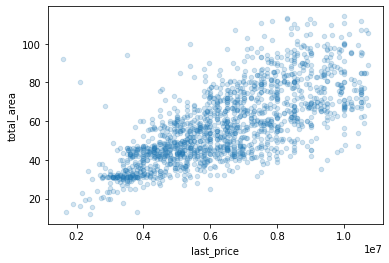

Коэффициент корреляции Пирсона: 0.7136414582475983


In [51]:
data_city_center.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
plt.show()
print('Коэффициент корреляции Пирсона:', data_city_center['last_price'].corr(data_city_center['total_area']))

Видно, что имеется прямая зависимости между общей площадью и стоимостью квартиры, коэффициент Пирсона равен 0.71, что немного больше чем на общей базе данных, с коэффициентом 0.68.

#### Влияние числа комнат на цену квартиры в центре города

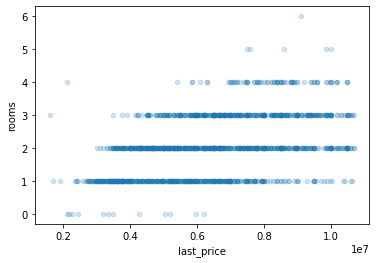

Коэффициент корреляции Пирсона: 0.44447190161581135


In [52]:
data_city_center.plot(x='last_price', y='rooms', kind='scatter', alpha=0.2)
plt.show()
print('Коэффициент корреляции Пирсона:', data_city_center['last_price'].corr(data_city_center['rooms']))

Видно, что имеется незначительная прямая зависимости между числом комнат и стоимостью квартиры, коэффициент Пирсона равен 0.44, что близко к значению на общей базе данных, с коэффициентом 0.43.

#### Влияние удалённости от центра на цену квартиры в центральной части города

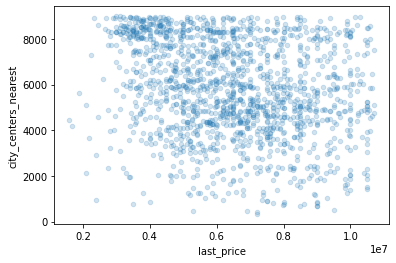

Коэффициент корреляции Пирсона: -0.23193136498572597


In [53]:
data_city_center.plot(x='last_price', y='city_centers_nearest', kind='scatter', alpha=0.2)
plt.show()
print('Коэффициент корреляции Пирсона:', data_city_center['last_price'].corr(data_city_center['city_centers_nearest']))

Видно, что имеется очень маленькая обратная зависимости между расстоянием от цента города и стоимостью квартиры, коэффициент Пирсона равен -0.23, что меньше чем на общей базе данных, с коэффициентом -0.33.

#### Влияние этажа на цену квартиры в центре города

Построим ящик с усами и посмотрим статистические величины для первого, последнего и средних этажей

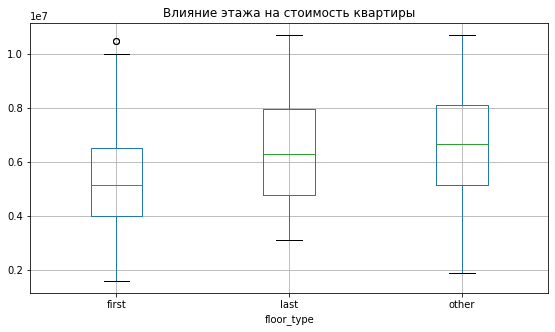

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
first,215.0,5.432641e+06,1.858861e+06,1600000.0,4000000.0,5150000.0,6500000.0,10500000.0
last,256.0,6.453866e+06,1.929774e+06,3100000.0,4787500.0,6300000.0,7960000.0,10700000.0
other,1101.0,6.656847e+06,1.981014e+06,1900000.0,5150000.0,6650000.0,8100000.0,10700000.0


In [54]:
data_city_center.boxplot(column='last_price', by='floor_type', figsize=(9,5))
plt.suptitle('')
plt.title('Влияние этажа на стоимость квартиры')
plt.show()
data_city_center.groupby(by='floor_type')['last_price'].describe()

Из диаграммы "ящик с усами" и сводных статистик видно, что стоимость квартиры зависит от этажа на котором она расположена:
1. квартиры первого этажа имеют наименьшую стоимость, в среднем она составляет 5.43 млн. руб,
2. квартиры верхнего этажа имеют промежуточную стоимость, которая в среднем составляет 6.45 млн. руб.,
3. квартиры средних этажей имеют наибольшую стоимость, в среднем 6.66 млн. руб.

Характер изменения цены от этажа для центра города совпадает с данными по общей базе.

#### Влияние даты размещения на цену квартиры в центре города

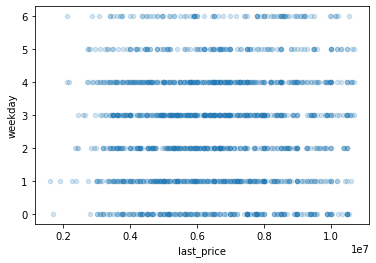

Коэффициент корреляции Пирсона: 0.03229565623330238


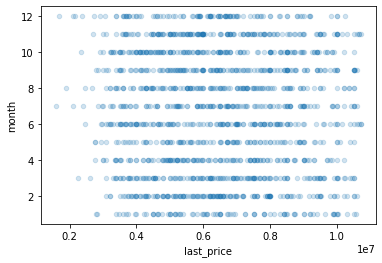

Коэффициент корреляции Пирсона: -0.031237366996070274


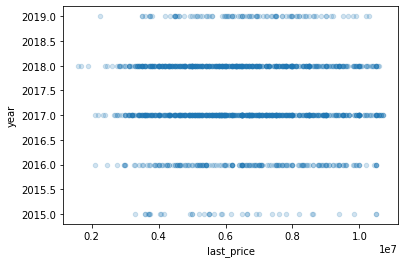

Коэффициент корреляции Пирсона: -0.013810959262240997


In [55]:
data_city_center.plot(x='last_price', y='weekday', kind='scatter', alpha=0.2)
plt.show()
print('Коэффициент корреляции Пирсона:', data_city_center['last_price'].corr(data_city_center['weekday']))
data_city_center.plot(x='last_price', y='month', kind='scatter', alpha=0.2)
plt.show()
print('Коэффициент корреляции Пирсона:', data_city_center['last_price'].corr(data_city_center['month']))
data_city_center.plot(x='last_price', y='year', kind='scatter', alpha=0.2)
plt.show()
print('Коэффициент корреляции Пирсона:', data_city_center['last_price'].corr(data_city_center['year']))

Из диаграмм рассеяния видно, что какой то явной зависимости цены от дня недели, месяца и года не наблюдается (видно изменение плотности точек для разных времен размещения объявления, например в будни дредложений больше чем на выходных, но характер изменения плотнисти одинаков). Данные выводы совпадают с выводами по общей базе данных.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно было бы сравнить центр и весь город в целом, для наглядности наших расчетов.
    
</div>

## Общий вывод по результатам исследования

В ходе исследования определены параметры влияющие на стоимость жилой недвижимости в городе Санкт-Петербург и соседних населённых пунктах.

Факторы влияние которых имеет значение как для центра города, так и для ближайших населённых пунктов, в порядке убывания значимости:
1. Общая площадь квартиры, прямая зависимость;
2. Число комнат, прямая зависимость;
3. Удалённость от центра города, обратная зависимость.
4. Этаж на котором расположена квартира, нижние этажи дешевле, средние самые дорогие.

Факторы влияние которых не имеет значения:
1. Дата размещения объявления.

Определены сроки продажи квартир: 25 % квартир продаются за 33 дня, половина квартир продаётся за 84 дня, а 75 % квартир за 169 дней.

Статистические параметры квартир отличаются для центра города от всех предложений:
1. Стоимость в центре города больше,
2. Общая площадь в центре города больше,
3. Высота потолков в центре города больше.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за совет. Увидел примеры стилизации, которые я не знал и они могут пригодиться в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b>
    
Спасибо за ревью моего проекта, получил ценные замечания и советы, которые буду стараться применять при решении будущих задач.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Рад, что в целом все понятно. Спасибо за твой фидбек, он ценен для меня. Тогда предлагаю двигаться дальше.   
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>